# LSTM - por intervalos - datos 1 dia

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,classification_report
from tensorflow import keras

In [2]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


# INTERVALO 1

Cargamos los datos:

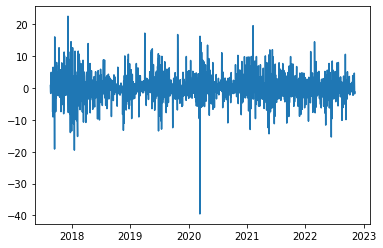

In [3]:
run 1dia-porintervalos1.ipynb

## CONJUNTO DE DATOS 1

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [4]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(6))
    model.compile(optimizer=optimizer_fun, loss=loss_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [5]:
modelLSTM100 = build_model1(32,6,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 11, 16)            3136      
                                                                 
 lstm_2 (LSTM)               (None, 11, 11)            1232      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 640       
                                                                 
 dense (Dense)               (None, 6)                 54        
                                                                 
Total params: 9,414
Trainable params: 9,414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] - 8

In [6]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.33858267716535434
Tasa de aciertos balanceada regresión logística: 0.15
Matriz de confusión:
[[  0   0   3   0   0   0]
 [  0   1  11   0   1   0]
 [ 16  15 127   0   3   0]
 [  5  15 152   0   2   0]
 [  1   1  23   0   1   0]
 [  0   0   4   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.03      0.08      0.04        13
         3.0       0.40      0.79      0.53       161
         4.0       0.00      0.00      0.00       174
         5.0       0.14      0.04      0.06        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.34       381
   macro avg       0.10      0.15      0.11       381
weighted avg       0.18      0.34      0.23       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas

In [7]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 11, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 11, 32)            12416     
                                                                 
 lstm_6 (LSTM)               (None, 11, 21)            4536      
                                                                 
 lstm_7 (LSTM)               (None, 16)                2432      
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 36,382
Trainable params: 36,382
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================]

In [8]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0]
 [160   0   0   0   0   1   0]
 [174   0   0   0   0   0   0]
 [ 26   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       3.0
         2.0       0.00      0.00      0.00      13.0
         3.0       0.00      0.00      0.00     161.0
         4.0       0.00      0.00      0.00     174.0
         5.0       0.00      0.00      0.00      26.0
         6.0       0.00      0.00      0.00       4.0

    accuracy                           0.00     381.0
   macro avg       0.00      0.00      0.00     381.0
weighted avg       0.00      0.00      0.00     381.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [9]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 11, 32)            4352      
                                                                 
 lstm_9 (LSTM)               (None, 11, 16)            3136      
                                                                 
 lstm_10 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 640       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 9,414
Trainable params: 9,414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] -

In [10]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.06561679790026247
Tasa de aciertos balanceada regresión logística: 0.09
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0]
 [ 7  2  0  0  2  2  0]
 [83 41  0  0 19 18  0]
 [93 49  0  0 21 11  0]
 [12  4  0  0  7  3  0]
 [ 1  0  0  0  2  1  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.01      0.33      0.02         3
         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00       161
         4.0       0.41      0.12      0.19       174
         5.0       0.09      0.12      0.10        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.07       381
   macro avg       0.07      0.08      0.04       381
weighted avg       0.19      0.07      0.09       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [11]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(6, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

Modelo 100 neuronas:

In [12]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_14 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 6)                 306       
                                                                 
Total params: 171,906
Trainable params: 171,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [=============================

In [13]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.3333333333333333
Tasa de aciertos balanceada regresión logística: 0.18
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   2   1   0]
 [  0   0   0   2   6   5   0]
 [  2   5   0  12  98  44   0]
 [  0   6   2  13 104  49   0]
 [  1   1   0   2  11  11   0]
 [  0   0   0   1   2   1   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        13
         3.0       0.40      0.07      0.13       161
         4.0       0.47      0.60      0.52       174
         5.0       0.10      0.42      0.16        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.33       381
   macro avg       0.14      0.16      0.12       381
weighted avg       0.39      0.33      0.30       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [14]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_17 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_18 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_19 (LSTM)              (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
Total params: 70,854
Trainable params: 70,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================]

In [15]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.07086614173228346
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   1   1   1   0   0   0]
 [  0   3   9   1   0   0   0]
 [  2  50  93  16   0   0   0]
 [  6  48 109  10   0   1   0]
 [  0   6  17   2   0   1   0]
 [  0   2   2   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.01      0.33      0.02         3
         2.0       0.04      0.69      0.07        13
         3.0       0.53      0.10      0.17       161
         4.0       0.00      0.00      0.00       174
         5.0       0.50      0.04      0.07        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.07       381
   macro avg       0.15      0.17      0.05       381
weighted avg       0.26      0.07      0.08       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [16]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_21 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_22 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_23 (LSTM)              (None, 16)                2112      
                                                                 
 dense_5 (Dense)             (None, 6)                 102       
                                                                 
Total params: 18,022
Trainable params: 18,022
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================]

In [17]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [ 12   0   0   0   0   1   0]
 [153   1   0   0   0   7   0]
 [160   6   0   0   0   8   0]
 [ 26   0   0   0   0   0   0]
 [  3   0   1   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       3.0
         2.0       0.00      0.00      0.00      13.0
         3.0       0.00      0.00      0.00     161.0
         4.0       0.00      0.00      0.00     174.0
         5.0       0.00      0.00      0.00      26.0
         6.0       0.00      0.00      0.00       4.0

    accuracy                           0.00     381.0
   macro avg       0.00      0.00      0.00     381.0
weighted avg       0.00      0.00      0.00     381.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

In [18]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(6, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model


Modelo 100 neuronas:

In [19]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_25 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_26 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_27 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_28 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_29 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_30 (LSTM)              (None, 11, 14)           

In [20]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.03937007874015748
Tasa de aciertos balanceada regresión logística: 0.18
Matriz de confusión:
[[  0   3   0   0   0   0]
 [  0  13   0   0   0   0]
 [  0 140   0   0  21   0]
 [  0 154   0   0  20   0]
 [  0  24   0   0   2   0]
 [  0   4   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.04      1.00      0.07        13
         3.0       0.00      0.00      0.00       161
         4.0       0.00      0.00      0.00       174
         5.0       0.05      0.08      0.06        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.04       381
   macro avg       0.01      0.18      0.02       381
weighted avg       0.00      0.04      0.01       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 64 neuronas:

In [21]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_34 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_35 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_36 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_37 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_38 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_39 (LSTM)              (None, 11, 9)            

In [22]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.0
Tasa de aciertos balanceada regresión logística: 0.00
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0]
 [161   0   0   0   0   0   0]
 [174   0   0   0   0   0   0]
 [ 26   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       3.0
         2.0       0.00      0.00      0.00      13.0
         3.0       0.00      0.00      0.00     161.0
         4.0       0.00      0.00      0.00     174.0
         5.0       0.00      0.00      0.00      26.0
         6.0       0.00      0.00      0.00       4.0

    accuracy                           0.00     381.0
   macro avg       0.00      0.00      0.00     381.0
weighted avg       0.00      0.00      0.00     381.0



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [23]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_43 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_44 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_45 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_46 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_47 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_48 (LSTM)              (None, 11, 5)            

In [24]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.4225721784776903
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   3   0   0   0]
 [  0   0  13   0   0   0]
 [  0   0 161   0   0   0]
 [  0   0 174   0   0   0]
 [  0   0  26   0   0   0]
 [  0   0   4   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        13
         3.0       0.42      1.00      0.59       161
         4.0       0.00      0.00      0.00       174
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.42       381
   macro avg       0.07      0.17      0.10       381
weighted avg       0.18      0.42      0.25       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [25]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_52 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_53 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_54 (LSTM)              (None, 25)                5900      
                                                                 
 dense_9 (Dense)             (None, 6)                 156       
                                                                 
Total params: 88,144
Trainable params: 88,144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================]

48/48 [==============================] - 1s 31ms/step - loss: 1.3523 - accuracy: 0.1568
Epoch 72/100
48/48 [==============================] - 1s 30ms/step - loss: 0.8762 - accuracy: 0.1490
Epoch 73/100
48/48 [==============================] - 1s 29ms/step - loss: 0.7871 - accuracy: 0.1457
Epoch 74/100
48/48 [==============================] - 1s 30ms/step - loss: 1.0563 - accuracy: 0.1417
Epoch 75/100
48/48 [==============================] - 2s 32ms/step - loss: 1.3967 - accuracy: 0.1391
Epoch 76/100
48/48 [==============================] - 1s 31ms/step - loss: 1.7545 - accuracy: 0.1594
Epoch 77/100
48/48 [==============================] - 1s 31ms/step - loss: 1.6166 - accuracy: 0.1575
Epoch 78/100
48/48 [==============================] - 2s 33ms/step - loss: 1.7253 - accuracy: 0.1463
Epoch 79/100
48/48 [==============================] - 1s 31ms/step - loss: 1.3426 - accuracy: 0.1463
Epoch 80/100
48/48 [==============================] - 2s 31ms/step - loss: 1.3822 - accuracy: 0.1444
Epo

In [26]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.13123359580052493
Tasa de aciertos balanceada regresión logística: 0.15
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0  0  2  1  0  0  0]
 [ 2  1  8  1  1  0  0]
 [10 14 87 36  5  9  0]
 [21 22 77 48  6  0  0]
 [ 1  3 15  5  2  0  0]
 [ 0  1  2  1  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.04      0.62      0.08        13
         3.0       0.39      0.22      0.28       161
         4.0       0.43      0.03      0.06       174
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.13       381
   macro avg       0.12      0.12      0.06       381
weighted avg       0.36      0.13      0.15       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [27]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_56 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_57 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_58 (LSTM)              (None, 16)                2432      
                                                                 
 dense_10 (Dense)            (None, 6)                 102       
                                                                 
Total params: 36,382
Trainable params: 36,382
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [28]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.16535433070866143
Tasa de aciertos balanceada regresión logística: 0.09
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0]
 [ 0  5  0  2  4  2  0]
 [ 9 64  0 25 29 34  0]
 [ 8 70  0 27 33 36  0]
 [ 4 13  0  3  1  5  0]
 [ 0  2  0  0  1  1  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        13
         3.0       0.43      0.16      0.23       161
         4.0       0.48      0.19      0.27       174
         5.0       0.06      0.19      0.10        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.17       381
   macro avg       0.14      0.08      0.09       381
weighted avg       0.40      0.17      0.23       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [29]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_60 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_61 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_62 (LSTM)              (None, 8)                 640       
                                                                 
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
Total params: 9,414
Trainable params: 9,414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================] 

In [30]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.24934383202099739
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0  1  0  1  0  1  0]
 [ 1  2  0  3  3  4  0]
 [ 6 45  0 27 41 42  0]
 [ 9 42  2 29 59 33  0]
 [ 2  8  0  3  5  8  0]
 [ 0  1  0  0  2  1  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.01      0.33      0.02         3
         2.0       0.00      0.00      0.00        13
         3.0       0.43      0.17      0.24       161
         4.0       0.54      0.34      0.42       174
         5.0       0.09      0.31      0.14        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.25       381
   macro avg       0.15      0.16      0.12       381
weighted avg       0.43      0.25      0.30       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [31]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_64 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_65 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_66 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 6)                 306       
                                                                 
Total params: 171,906
Trainable params: 171,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [============================

48/48 [==============================] - 2s 43ms/step - loss: -1.7423 - accuracy: 0.1811
Epoch 72/100
48/48 [==============================] - 2s 42ms/step - loss: -2.1924 - accuracy: 0.1759
Epoch 73/100
48/48 [==============================] - 2s 43ms/step - loss: -2.9725 - accuracy: 0.1759
Epoch 74/100
48/48 [==============================] - 2s 43ms/step - loss: -2.6384 - accuracy: 0.1909
Epoch 75/100
48/48 [==============================] - 2s 45ms/step - loss: -2.2030 - accuracy: 0.1791
Epoch 76/100
48/48 [==============================] - 2s 45ms/step - loss: -2.5127 - accuracy: 0.1811
Epoch 77/100
48/48 [==============================] - 2s 44ms/step - loss: -2.9736 - accuracy: 0.1844
Epoch 78/100
48/48 [==============================] - 2s 43ms/step - loss: -3.4728 - accuracy: 0.1890
Epoch 79/100
48/48 [==============================] - 2s 45ms/step - loss: -4.2851 - accuracy: 0.1949
Epoch 80/100
48/48 [==============================] - 2s 46ms/step - loss: -4.5124 - accuracy: 

In [32]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.16010498687664043
Tasa de aciertos balanceada regresión logística: 0.11
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0]
 [ 1  3  4  2  3  0  0]
 [24 23 50 29 30  5  0]
 [30 24 43 40 28  9  0]
 [ 2  3 11  9  1  0  0]
 [ 0  3  1  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.04      0.31      0.07        13
         3.0       0.36      0.18      0.24       161
         4.0       0.44      0.16      0.24       174
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.16       381
   macro avg       0.12      0.09      0.08       381
weighted avg       0.35      0.16      0.21       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [33]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_67 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_68 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_69 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_70 (LSTM)              (None, 32)                8320      
                                                                 
 dense_13 (Dense)            (None, 6)                 198       
                                                                 
Total params: 70,854
Trainable params: 70,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [34]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.16010498687664043
Tasa de aciertos balanceada regresión logística: 0.13
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   0   3   0   0   0   0]
 [  0   0   6   2   5   0   0]
 [  6   0  97  20  38   0   0]
 [  9   0 105  25  35   0   0]
 [  0   0  16   4   6   0   0]
 [  0   0   3   1   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.03      0.46      0.05        13
         3.0       0.38      0.12      0.19       161
         4.0       0.42      0.20      0.27       174
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.16       381
   macro avg       0.12      0.11      0.07       381
weighted avg       0.35      0.16      0.20       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [35]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_72 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_73 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_74 (LSTM)              (None, 16)                2112      
                                                                 
 dense_14 (Dense)            (None, 6)                 102       
                                                                 
Total params: 18,022
Trainable params: 18,022
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
48/48 [==============================

In [36]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.11548556430446194
Tasa de aciertos balanceada regresión logística: 0.15
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0  1  0  0  1  1  0]
 [ 3  1  0  1  3  5  0]
 [26 28  3  4 26 74  0]
 [20 25  7  8 30 84  0]
 [ 4  5  2  2  4  9  0]
 [ 1  1  0  0  0  2  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.02      0.33      0.03         3
         2.0       0.00      0.00      0.00        13
         3.0       0.27      0.02      0.05       161
         4.0       0.47      0.17      0.25       174
         5.0       0.05      0.35      0.09        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.12       381
   macro avg       0.11      0.13      0.06       381
weighted avg       0.33      0.12      0.14       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [37]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_76 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_77 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_78 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_79 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_80 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_81 (LSTM)              (None, 11, 14)          

In [38]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.08923884514435695
Tasa de aciertos balanceada regresión logística: 0.07
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 1  0  1  0  0  1  0]
 [ 0  3  2  4  1  3  0]
 [42 29 25 30  3 32  0]
 [41 31 32 30  0 40  0]
 [ 5  2  8  9  0  2  0]
 [ 3  1  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.03      0.15      0.05        13
         3.0       0.41      0.19      0.26       161
         4.0       0.00      0.00      0.00       174
         5.0       0.03      0.08      0.04        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.09       381
   macro avg       0.07      0.06      0.05       381
weighted avg       0.18      0.09      0.11       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [39]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_85 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_86 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_87 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_88 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_89 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_90 (LSTM)              (None, 11, 9)           

In [40]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.07349081364829396
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[  3   0   0   0   0   0]
 [ 11   0   0   2   0   0]
 [134   0   0  27   0   0]
 [149   0   0  25   0   0]
 [ 23   0   0   3   0   0]
 [  2   0   0   2   0   0]]
              precision    recall  f1-score   support

         1.0       0.01      1.00      0.02         3
         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00       161
         4.0       0.42      0.14      0.21       174
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.07       381
   macro avg       0.07      0.19      0.04       381
weighted avg       0.19      0.07      0.10       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [41]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_94 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_95 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_96 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_97 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_98 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_99 (LSTM)              (None, 11, 5)           

In [42]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.16535433070866143
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   2   0   0   1   0   0]
 [  5   6   0   0   2   0   0]
 [ 15  97   0   0  49   0   0]
 [ 12 101   0   0  61   0   0]
 [  2  13   0   0  11   0   0]
 [  0   3   0   0   1   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.01      0.67      0.02         3
         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00       161
         4.0       0.49      0.35      0.41       174
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.17       381
   macro avg       0.07      0.15      0.06       381
weighted avg       0.22      0.17      0.19       381



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

# CONJUNTO DE DATOS 2

In [4]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(6))
    model.compile(optimizer=optimizer_fun, loss=loss_fun, metrics=['accuracy'])
    return model

In [5]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(6, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

In [6]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(6, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [46]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_103 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_104 (LSTM)             (None, 21, 33)            11088     
                                                                 
 lstm_105 (LSTM)             (None, 25)                5900      
                                                                 
 dense_18 (Dense)            (None, 6)                 156       
                                                                 
Total params: 88,144
Trainable params: 88,144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================

In [47]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.043243243243243246
Tasa de aciertos balanceada regresión logística: 0.22
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   1   2   0   0   0   0]
 [  0   0  13   0   0   0   0]
 [  0  29 127   0   0   1   0]
 [  1  29 134   0   2   1   0]
 [  0   3  23   0   0   0   0]
 [  0   0   4   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.02      0.33      0.03         3
         2.0       0.04      1.00      0.08        13
         3.0       0.00      0.00      0.00       157
         4.0       1.00      0.01      0.02       167
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.04       370
   macro avg       0.15      0.19      0.02       370
weighted avg       0.45      0.04      0.01       370



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [48]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_106 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_107 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_108 (LSTM)             (None, 21, 21)            4536      
                                                                 
 lstm_109 (LSTM)             (None, 16)                2432      
                                                                 
 dense_19 (Dense)            (None, 6)                 102       
                                                                 
Total params: 36,382
Trainable params: 36,382
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================

In [49]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.37027027027027026
Tasa de aciertos balanceada regresión logística: 0.14
Matriz de confusión:
[[  0   0   0   3   0   0]
 [  1   0   0  12   0   0]
 [ 12  11   0 133   1   0]
 [ 25   5   0 137   0   0]
 [  2   3   0  21   0   0]
 [  1   0   0   3   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00       157
         4.0       0.44      0.82      0.58       167
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.37       370
   macro avg       0.07      0.14      0.10       370
weighted avg       0.20      0.37      0.26       370



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo 32 neuronas:

In [9]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 21, 32)            4352      
                                                                 
 lstm_5 (LSTM)               (None, 21, 16)            3136      
                                                                 
 lstm_6 (LSTM)               (None, 21, 11)            1232      
                                                                 
 lstm_7 (LSTM)               (None, 8)                 640       
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
Total params: 9,414
Trainable params: 9,414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================] -

47/47 [==============================] - 2s 46ms/step - loss: 17.4343 - accuracy: 0.0615
Epoch 71/100
47/47 [==============================] - 2s 47ms/step - loss: 17.4159 - accuracy: 0.0615
Epoch 72/100
47/47 [==============================] - 2s 45ms/step - loss: 17.3989 - accuracy: 0.0615
Epoch 73/100
47/47 [==============================] - 2s 47ms/step - loss: 17.2109 - accuracy: 0.0615
Epoch 74/100
47/47 [==============================] - 2s 49ms/step - loss: 17.1787 - accuracy: 0.0615
Epoch 75/100
47/47 [==============================] - 2s 50ms/step - loss: 17.1742 - accuracy: 0.0615
Epoch 76/100
47/47 [==============================] - 2s 45ms/step - loss: 17.1610 - accuracy: 0.0615
Epoch 77/100
47/47 [==============================] - 2s 51ms/step - loss: 17.1285 - accuracy: 0.0615
Epoch 78/100
47/47 [==============================] - 2s 46ms/step - loss: 16.9368 - accuracy: 0.0601
Epoch 79/100
47/47 [==============================] - 2s 45ms/step - loss: 15.1142 - accuracy: 

In [10]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.029649595687331536
Tasa de aciertos balanceada regresión logística: 0.12
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   2   1   0   0   0   0]
 [  0  12   0   1   0   0   0]
 [  9 122  17   9   0   0   0]
 [  5 130  22  11   0   0   0]
 [  1  17   5   3   0   0   0]
 [  0   4   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.01      0.67      0.01         3
         2.0       0.00      0.00      0.00        13
         3.0       0.38      0.06      0.10       157
         4.0       0.00      0.00      0.00       168
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.03       371
   macro avg       0.05      0.10      0.02       371
weighted avg       0.16      0.03      0.04       371



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [52]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_114 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_115 (LSTM)             (None, 21, 100)           80400     
                                                                 
 lstm_116 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_117 (LSTM)             (None, 50)                20200     
                                                                 
 dense_21 (Dense)            (None, 6)                 306       
                                                                 
Total params: 171,906
Trainable params: 171,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [============================

47/47 [==============================] - 4s 79ms/step - loss: -10.3443 - accuracy: 0.1250
Epoch 71/100
47/47 [==============================] - 4s 78ms/step - loss: -10.3564 - accuracy: 0.1250
Epoch 72/100
47/47 [==============================] - 3s 74ms/step - loss: -10.3322 - accuracy: 0.1250
Epoch 73/100
47/47 [==============================] - 4s 76ms/step - loss: -10.3564 - accuracy: 0.1250
Epoch 74/100
47/47 [==============================] - 4s 81ms/step - loss: -10.3564 - accuracy: 0.1250
Epoch 75/100
47/47 [==============================] - 4s 81ms/step - loss: -10.3564 - accuracy: 0.1250
Epoch 76/100
47/47 [==============================] - 4s 77ms/step - loss: -10.3564 - accuracy: 0.1257
Epoch 77/100
47/47 [==============================] - 3s 74ms/step - loss: -10.3443 - accuracy: 0.1257
Epoch 78/100
47/47 [==============================] - 4s 76ms/step - loss: -10.3564 - accuracy: 0.1250
Epoch 79/100
47/47 [==============================] - 4s 79ms/step - loss: -10.3530 - 

In [53]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.11081081081081082
Tasa de aciertos balanceada regresión logística: 0.05
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0]
 [ 11   0   0   0   2   0   0]
 [124   2   0   0  30   1   0]
 [123   0   0   0  40   4   0]
 [ 16   0   1   0   8   1   0]
 [  3   0   0   0   1   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00       157
         4.0       0.49      0.24      0.32       167
         5.0       0.17      0.04      0.06        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.11       370
   macro avg       0.09      0.04      0.06       370
weighted avg       0.23      0.11      0.15       370



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [54]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_118 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_119 (LSTM)             (None, 21, 64)            33024     
                                                                 
 lstm_120 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_121 (LSTM)             (None, 32)                8320      
                                                                 
 dense_22 (Dense)            (None, 6)                 198       
                                                                 
Total params: 70,854
Trainable params: 70,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================

In [55]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.13513513513513514
Tasa de aciertos balanceada regresión logística: 0.17
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0]
 [  0  10   0   1   1   1   0]
 [  3  91   7  37   9  10   0]
 [  4 103   6  29  10  15   0]
 [  0  18   0   3   4   1   0]
 [  0   2   0   2   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.01      0.67      0.02         3
         2.0       0.00      0.00      0.00        13
         3.0       0.51      0.24      0.32       157
         4.0       0.42      0.06      0.10       167
         5.0       0.04      0.04      0.04        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.14       370
   macro avg       0.14      0.14      0.07       370
weighted avg       0.41      0.14      0.19       370



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [12]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 21, 32)            4352      
                                                                 
 lstm_9 (LSTM)               (None, 21, 32)            8320      
                                                                 
 lstm_10 (LSTM)              (None, 21, 16)            3136      
                                                                 
 lstm_11 (LSTM)              (None, 16)                2112      
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
Total params: 18,022
Trainable params: 18,022
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================]

47/47 [==============================] - 3s 55ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 71/100
47/47 [==============================] - 2s 48ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 72/100
47/47 [==============================] - 2s 42ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 73/100
47/47 [==============================] - 2s 43ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 74/100
47/47 [==============================] - 2s 45ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 75/100
47/47 [==============================] - 2s 46ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 76/100
47/47 [==============================] - 2s 43ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 77/100
47/47 [==============================] - 2s 46ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 78/100
47/47 [==============================] - 2s 41ms/step - loss: -24.3358 - accuracy: 0.0568
Epoch 79/100
47/47 [==============================] - 2s 43ms/step - loss: -24.3358 - 

In [13]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.03773584905660377
Tasa de aciertos balanceada regresión logística: 0.19
Matriz de confusión:
[[ 2  0  0  0  1  0]
 [ 7  3  0  1  2  0]
 [53 53  1  1 49  0]
 [70 48  0  3 47  0]
 [11  8  0  2  5  0]
 [ 3  1  0  0  0  0]]
              precision    recall  f1-score   support

         1.0       0.01      0.67      0.03         3
         2.0       0.03      0.23      0.05        13
         3.0       1.00      0.01      0.01       157
         4.0       0.43      0.02      0.03       168
         5.0       0.05      0.19      0.08        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.04       371
   macro avg       0.25      0.19      0.03       371
weighted avg       0.62      0.04      0.03       371



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [14]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 21, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 21, 50)            30200     
                                                                 
 lstm_14 (LSTM)              (None, 21, 33)            11088     
                                                                 
 lstm_15 (LSTM)              (None, 21, 25)            5900      
                                                                 
 lstm_16 (LSTM)              (None, 21, 20)            3680      
                                                                 
 lstm_17 (LSTM)              (None, 21, 17)            2584      
                                                                 
 lstm_18 (LSTM)              (None, 21, 14)           

47/47 [==============================] - 5s 106ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 64/100
47/47 [==============================] - 5s 105ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 65/100
47/47 [==============================] - 5s 112ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 66/100
47/47 [==============================] - 5s 111ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 67/100
47/47 [==============================] - 5s 105ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 68/100
47/47 [==============================] - 5s 108ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 69/100
47/47 [==============================] - 5s 108ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 70/100
47/47 [==============================] - 5s 107ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 71/100
47/47 [==============================] - 5s 110ms/step - loss: -36.2681 - accuracy: 0.0500
Epoch 72/100
47/47 [==============================] - 5s 111ms/step - loss: -

In [16]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.0431266846361186
Tasa de aciertos balanceada regresión logística: 0.04
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  2   0   1   0   0   0   0]
 [ 10   1   2   0   0   0   0]
 [112  18  14  11   1   1   0]
 [112  24  16  13   3   0   0]
 [ 15   6   4   1   0   0   0]
 [  3   0   1   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.05      0.15      0.08        13
         3.0       0.44      0.07      0.12       157
         4.0       0.75      0.02      0.03       168
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.04       371
   macro avg       0.18      0.03      0.03       371
weighted avg       0.53      0.04      0.07       371



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas:

In [17]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 21, 64)            16896     
                                                                 
 lstm_22 (LSTM)              (None, 21, 32)            12416     
                                                                 
 lstm_23 (LSTM)              (None, 21, 21)            4536      
                                                                 
 lstm_24 (LSTM)              (None, 21, 16)            2432      
                                                                 
 lstm_25 (LSTM)              (None, 21, 13)            1560      
                                                                 
 lstm_26 (LSTM)              (None, 21, 11)            1100      
                                                                 
 lstm_27 (LSTM)              (None, 21, 9)            

47/47 [==============================] - 5s 98ms/step - loss: -36.9539 - accuracy: 0.4358
Epoch 64/100
47/47 [==============================] - 5s 105ms/step - loss: -36.9540 - accuracy: 0.4358
Epoch 65/100
47/47 [==============================] - 5s 97ms/step - loss: -36.9542 - accuracy: 0.4358
Epoch 66/100
47/47 [==============================] - 5s 98ms/step - loss: -36.9544 - accuracy: 0.4358
Epoch 67/100
47/47 [==============================] - 5s 103ms/step - loss: -36.9546 - accuracy: 0.4358
Epoch 68/100
47/47 [==============================] - 5s 112ms/step - loss: -36.9548 - accuracy: 0.4358
Epoch 69/100
47/47 [==============================] - 5s 107ms/step - loss: -36.9550 - accuracy: 0.4338
Epoch 70/100
47/47 [==============================] - 5s 95ms/step - loss: -36.9552 - accuracy: 0.4338
Epoch 71/100
47/47 [==============================] - 5s 105ms/step - loss: -36.9554 - accuracy: 0.4338
Epoch 72/100
47/47 [==============================] - 5s 100ms/step - loss: -36.9

In [18]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Tasa de acierto en regresión logística: {:.2f} 0.40161725067385445
Tasa de aciertos balanceada regresión logística: 0.16
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0]
 [  0   1   0  12   0   0   0]
 [  4   3   1 149   0   0   0]
 [  8   3   0 157   0   0   0]
 [  1   0   0  25   0   0   0]
 [  0   0   0   4   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        13
         3.0       0.43      0.95      0.59       157
         4.0       0.00      0.00      0.00       168
         5.0       0.00      0.00      0.00        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.40       371
   macro avg       0.06      0.14      0.08       371
weighted avg       0.18      0.40      0.25       371



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 32 neuronas:

In [19]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 21, 32)            4352      
                                                                 
 lstm_31 (LSTM)              (None, 21, 16)            3136      
                                                                 
 lstm_32 (LSTM)              (None, 21, 11)            1232      
                                                                 
 lstm_33 (LSTM)              (None, 21, 8)             640       
                                                                 
 lstm_34 (LSTM)              (None, 21, 6)             360       
                                                                 
 lstm_35 (LSTM)              (None, 21, 5)             240       
                                                                 
 lstm_36 (LSTM)              (None, 21, 5)            

47/47 [==============================] - 5s 98ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 64/100
47/47 [==============================] - 5s 116ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 65/100
47/47 [==============================] - 4s 89ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 66/100
47/47 [==============================] - 4s 87ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 67/100
47/47 [==============================] - 4s 87ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 68/100
47/47 [==============================] - 4s 87ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 69/100
47/47 [==============================] - 4s 86ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 70/100
47/47 [==============================] - 4s 87ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 71/100
47/47 [==============================] - 4s 92ms/step - loss: -37.3106 - accuracy: 0.0642
Epoch 72/100
47/47 [==============================] - 5s 99ms/step - loss: -37.3106 -

In [20]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

Tasa de acierto en regresión logística: {:.2f} 0.11590296495956873
Tasa de aciertos balanceada regresión logística: 0.05
Matriz de confusión:
[[  0   0   0   0   0   0   0]
 [  2   0   1   0   0   0   0]
 [ 10   1   2   0   0   0   0]
 [112  18  14  11   1   1   0]
 [112  24  16  13   3   0   0]
 [ 15   6   4   1   0   0   0]
 [  3   0   1   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        13
         3.0       0.42      0.27      0.33       157
         4.0       0.00      0.00      0.00       168
         5.0       0.50      0.04      0.07        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.12       371
   macro avg       0.13      0.04      0.06       371
weighted avg       0.21      0.12      0.14       371



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [21]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 21, 100)           40800     
                                                                 
 lstm_40 (LSTM)              (None, 21, 50)            30200     
                                                                 
 lstm_41 (LSTM)              (None, 21, 33)            11088     
                                                                 
 lstm_42 (LSTM)              (None, 25)                5900      
                                                                 
 dense_6 (Dense)             (None, 6)                 156       
                                                                 
Total params: 88,144
Trainable params: 88,144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================]

47/47 [==============================] - 3s 65ms/step - loss: 2.1085 - accuracy: 0.1372
Epoch 72/100
47/47 [==============================] - 3s 60ms/step - loss: 2.1085 - accuracy: 0.1372
Epoch 73/100
47/47 [==============================] - 3s 61ms/step - loss: 2.1327 - accuracy: 0.1372
Epoch 74/100
47/47 [==============================] - 3s 61ms/step - loss: 2.1396 - accuracy: 0.1372
Epoch 75/100
47/47 [==============================] - 3s 61ms/step - loss: 2.1258 - accuracy: 0.1372
Epoch 76/100
47/47 [==============================] - 3s 59ms/step - loss: 2.1085 - accuracy: 0.1372
Epoch 77/100
47/47 [==============================] - 3s 61ms/step - loss: 2.1085 - accuracy: 0.1372
Epoch 78/100
47/47 [==============================] - 3s 62ms/step - loss: 2.1258 - accuracy: 0.1372
Epoch 79/100
47/47 [==============================] - 3s 61ms/step - loss: 2.1206 - accuracy: 0.1372
Epoch 80/100
47/47 [==============================] - 3s 60ms/step - loss: 2.1396 - accuracy: 0.1372
Epo

In [22]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Tasa de acierto en regresión logística: {:.2f} 0.11859838274932614
Tasa de aciertos balanceada regresión logística: 0.14
Matriz de confusión:
[[ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  2  0]
 [ 3  2  2  2  2  2  0]
 [14 32 52 18 10 31  0]
 [15 38 52 13 19 31  0]
 [ 5  5  7  0  5  4  0]
 [ 1  0  2  0  0  1  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.01      0.33      0.02         3
         2.0       0.02      0.15      0.03        13
         3.0       0.55      0.11      0.19       157
         4.0       0.53      0.11      0.19       168
         5.0       0.06      0.15      0.08        26
         6.0       0.00      0.00      0.00         4

    accuracy                           0.12       371
   macro avg       0.17      0.12      0.07       371
weighted avg       0.47      0.12      0.17       371



C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SARA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

# CONJUNTO DE DATOS 3

In [ ]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(6))
    model.compile(optimizer=optimizer_fun, loss=loss_fun, metrics=['accuracy'])
    return model

In [ ]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(6, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

In [ ]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(6, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

# INTERVALO 2

Cargamos los datos:

In [ ]:
run 1dia-porintervalos2.ipynb

## CONJUNTO DE DATOS 1

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [ ]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(5))
    model.compile(optimizer=optimizer_fun, loss=loss_fun, metrics=['accuracy'])
    return model

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(32,6,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=10)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(5, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

In [ ]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(5, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model


Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX1)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX1)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX1, trainy1, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX1)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion1 = confusion_matrix(testy1, y_predLSTM32)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy1))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy1, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion1))
print(classification_report(testy1, y_predLSTM32))

# CONJUNTO DE DATOS 2

In [ ]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(5))
    model.compile(optimizer=optimizer_fun, loss=loss_fun, metrics=['accuracy'])
    return model

In [ ]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(5, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

In [ ]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(5, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion2 = confusion_matrix(testy2, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy2))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy2, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion2))
print(classification_report(testy2, y_predLSTM32))

# CONJUNTO DE DATOS 3

In [ ]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(5))
    model.compile(optimizer=optimizer_fun, loss=loss_fun, metrics=['accuracy'])
    return model

In [ ]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(5, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

In [ ]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(5, activation=activation_fun))
    model.compile(loss=loss_fun, metrics=['accuracy'], optimizer=optimizer_fun)
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adam')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adam')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adam')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','binary_crossentropy','adagrad')
modelLSTM100.summary()
modelLSTM100.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)
y_predLSTM100 =  y_predLSTM100.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM100, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM100)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM100))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','binary_crossentropy','adagrad')
modelLSTM64.summary()
modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)
y_predLSTM64 =  y_predLSTM64.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM64)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM64, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM64)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','binary_crossentropy','adagrad')
modelLSTM32.summary()
modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)
y_predLSTM32 =  y_predLSTM32.argmax(axis=-1)
confusion3 = confusion_matrix(testy3, y_predLSTM100)
print("Tasa de acierto en regresión logística: {:.2f}", acierto(y_predLSTM32, testy3))
print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(balanced_accuracy_score(testy3, y_predLSTM32)))
print("Matriz de confusión:\n{}".format(confusion3))
print(classification_report(testy3, y_predLSTM32))